In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy.interpolate import make_interp_spline


In [2]:
def set_plot_ax(ax):
    ax.yaxis.label.set_size(14)
    ax.yaxis.label.set_fontweight('bold')
    ax.xaxis.label.set_size(14)
    ax.xaxis.label.set_fontweight('bold')
    ax.title.set_fontsize(16)
    ax.title.set_fontweight('bold')
    for label in ax.get_yticklabels():
        # label.set_fontsize(12)
        label.set_fontweight('bold')

    for tick in ax.get_xticklabels():
        # tick.set_rotation(15)
        # tick.set_fontsize(12)
        tick.set_fontweight('bold')

    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
        # label.set_fontsize(12)  

In [3]:
def fake_arr(arr):

    fake = np.zeros(len(arr) * 2 - 1)
    for i in range(len(arr)):
        fake[i * 2] = arr[i]
        if i < len(arr) - 1:
            fake[i * 2 + 1] = (arr[i] + arr[i + 1]) / 2

    return fake

fake_arr([1, 2, 3, 4, 5])

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [4]:
def fake_arr2(arr):
    # First iteration: Double the points by adding midpoints
    fake = np.zeros(len(arr) * 2 - 1)
    for i in range(len(arr)):
        fake[i * 2] = arr[i]
        if i < len(arr) - 1:
            fake[i * 2 + 1] = (arr[i] + arr[i + 1]) / 2
    
    # Second iteration: Double the points again by adding midpoints
    result = np.zeros(len(fake) * 2 - 1)
    for i in range(len(fake)):
        result[i * 2] = fake[i]
        if i < len(fake) - 1:
            result[i * 2 + 1] = (fake[i] + fake[i + 1]) / 2
    
    return result


fake_arr2([1, 2, 3, 4, 5])

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

In [5]:
# Generate the plot
nv_data = pd.read_csv('new_csv/normalizedPerfCFP.csv')
nv_data.columns = nv_data.columns.str.strip()  # Remove any extra spaces in column names

FileNotFoundError: [Errno 2] No such file or directory: 'new_csv/normalizedPerfCFP.csv'

In [ ]:
# Define the function for plotting
def normalized_perf_plot(nv, server=True):
    # Configuration constants
    FACTOR = 2.8
    TITLE_FONT_SIZE = 22 * FACTOR
    LABEL_FONT_SIZE = 14 * FACTOR
    TICK_FONT_SIZE = 14 * FACTOR
    AXIS_LABEL_FONT_SIZE = 18 * FACTOR
    LEGEND_FONT_SIZE = 15 * FACTOR
    LINE_WIDTH = 5 * FACTOR
    MARKER_SIZE = 12 * FACTOR
    GRID_ALPHA = 0.2
    SPLINE = 3
    LABEL_COLOR = '#4a4a4a'  # Dark grey for better contrast and warmth

    # Colors from the provided palette
    COLOR_0 = '#006400'  # Dark green for consistency
    COLOR_4 = '#4682B4'  # Steel blue

    # Set figure size and create primary axis
    fig_width, fig_height = 20, 12
    fig1, ax1 = plt.subplots(figsize=(fig_width, fig_height))

    # Prepare data
    x_data = np.arange(len(nv['Product']))
    x_labels = nv['Product']
    x_data_fake = fake_arr(x_data)
    x_data_fake2 = fake_arr2(x_data)
    x_smooth = np.linspace(x_data.min(), x_data.max(), 500)

    # Track handles for the legend
    legend_handles = []

    # Total Chip Sold Normalized (Primary Y Axis - ax1)
    y_total_chip_sold = nv['Total Chip Sold Normalized']
    y_total_chip_sold_fake = fake_arr(y_total_chip_sold)
    spline_total_chip_sold = make_interp_spline(x_data_fake, y_total_chip_sold_fake, k=SPLINE)
    y_total_chip_sold_smooth = spline_total_chip_sold(x_smooth)

    # Plot Total Chip Sold Normalized
    ax1.plot(x_smooth, y_total_chip_sold_smooth, color=COLOR_0, linewidth=LINE_WIDTH)
    handle_chip, = ax1.plot(x_data, y_total_chip_sold, marker='o', linestyle='None', markersize=MARKER_SIZE, color=COLOR_0, alpha=0.8, label='Total Chips Shipment')
    legend_handles.append(handle_chip)

    # Total CFP Normalized (Primary Y Axis - ax1)
    y_total_cfp = nv['Total CFP Normalized']
    y_total_cfp_fake = fake_arr(y_total_cfp)
    spline_total_cfp = make_interp_spline(x_data_fake, y_total_cfp_fake, k=SPLINE)
    y_total_cfp_smooth = spline_total_cfp(x_smooth)

    # Plot Total CFP Normalized
    ax1.plot(x_smooth, y_total_cfp_smooth, color=COLOR_0, linewidth=LINE_WIDTH)
    handle_cfp, = ax1.plot(x_data, y_total_cfp, marker='s',linestyle="None" ,markersize=MARKER_SIZE + 5, color=COLOR_0, alpha=0.8, label='Total CFP')
    legend_handles.append(handle_cfp)

    # CFP per Chip Normalized (Primary Y Axis - ax1)
    y_cfp_per_chip = nv['CFP per Chip Normalized']
    y_cfp_per_chip_fake = fake_arr2(y_cfp_per_chip)
    spline_cfp_per_chip = make_interp_spline(x_data_fake2, y_cfp_per_chip_fake, k=SPLINE)
    y_cfp_per_chip_smooth = spline_cfp_per_chip(x_smooth)

    # Plot CFP per Chip Normalized
    ax1.plot(x_smooth, y_cfp_per_chip_smooth, color=COLOR_0, linewidth=LINE_WIDTH)
    handle_cfp_chip, = ax1.plot(x_data, y_cfp_per_chip, marker='D', linestyle="None", markersize=MARKER_SIZE, color=COLOR_0, alpha=0.8, label='CFP per Chip')
    legend_handles.append(handle_cfp_chip)

    # TFLOPS / CFP Normalized (Secondary Y Axis - ax2)
    y_tflops_cfp = nv['TFLOPS/CFP']
    y_tflops_cfp_fake = fake_arr2(y_tflops_cfp)
    spline_tflops_cfp = make_interp_spline(x_data_fake2, y_tflops_cfp_fake, k=SPLINE)
    y_tflops_cfp_smooth = spline_tflops_cfp(x_smooth)

    ax2 = ax1.twinx()  # Create a secondary y-axis for TFLOPS/CFP
    ax2.set_ylabel('TFLOPS / CFP', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=COLOR_4)

    # Plot TFLOPS / CFP Normalized
    ax2.plot(x_smooth, y_tflops_cfp_smooth, color=COLOR_4, linewidth=LINE_WIDTH)
    handle_tflops, = ax2.plot(x_data, y_tflops_cfp, marker='^', linestyle="None",markersize=MARKER_SIZE + 4, color=COLOR_4, alpha=0.8, label='TFLOPS / CFP')
    legend_handles.append(handle_tflops)

    # Customize axes appearance
    # Primary Y Axis (ax1)
    ax1.tick_params(axis='y', labelsize=TICK_FONT_SIZE, colors=COLOR_0, width=2, length=10, direction='inout')
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['left'].set_color(COLOR_0)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_yticks(ax1.get_yticks())
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=TICK_FONT_SIZE, fontweight='bold')
    ax1.set_ylim(bottom=0)
    ax1.grid(visible=True, linestyle='--', linewidth=1, alpha=GRID_ALPHA)

    # Secondary Y Axis (ax2)
    ax2.tick_params(axis='y', labelsize=TICK_FONT_SIZE, colors=COLOR_4, width=2, length=10, direction='inout')
    ax2.spines['right'].set_linewidth(2)
    ax2.spines['right'].set_color(COLOR_4)
    ax2.spines['left'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    ax2.set_yticks(ax2.get_yticks())
    ax2.set_yticklabels(ax2.get_yticks(), fontsize=TICK_FONT_SIZE, fontweight='bold')
    # Primary X Axis
    ax1.set_xticks(x_data)
    ax1.set_xticklabels(x_labels, fontsize=TICK_FONT_SIZE, fontweight='bold', color=LABEL_COLOR)

    # Secondary X Axis (Release Date)
    ax3 = ax1.twiny()
    ax3.spines['top'].set_position(('outward', 20))
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticks(x_data)
    ax3.set_xticklabels(nv['Release Date'], fontsize=TICK_FONT_SIZE, fontweight='bold', color=LABEL_COLOR)
    ax3.tick_params(axis='both', which='major', labelsize=TICK_FONT_SIZE, colors=LABEL_COLOR)
    ax3.spines['top'].set_linewidth(2)
    ax3.spines['top'].set_color(LABEL_COLOR)

    # Manually create the legend to only include desired markers
    labels = ['Total Chips Shipment', 'Total CFP', 'CFP per Chip', 'TFLOPS / CFP']
    fig1.legend(legend_handles, labels, loc='upper center', fontsize=LABEL_FONT_SIZE, frameon=False, ncol=1, bbox_to_anchor=(0.35, 0.9))

    return fig1


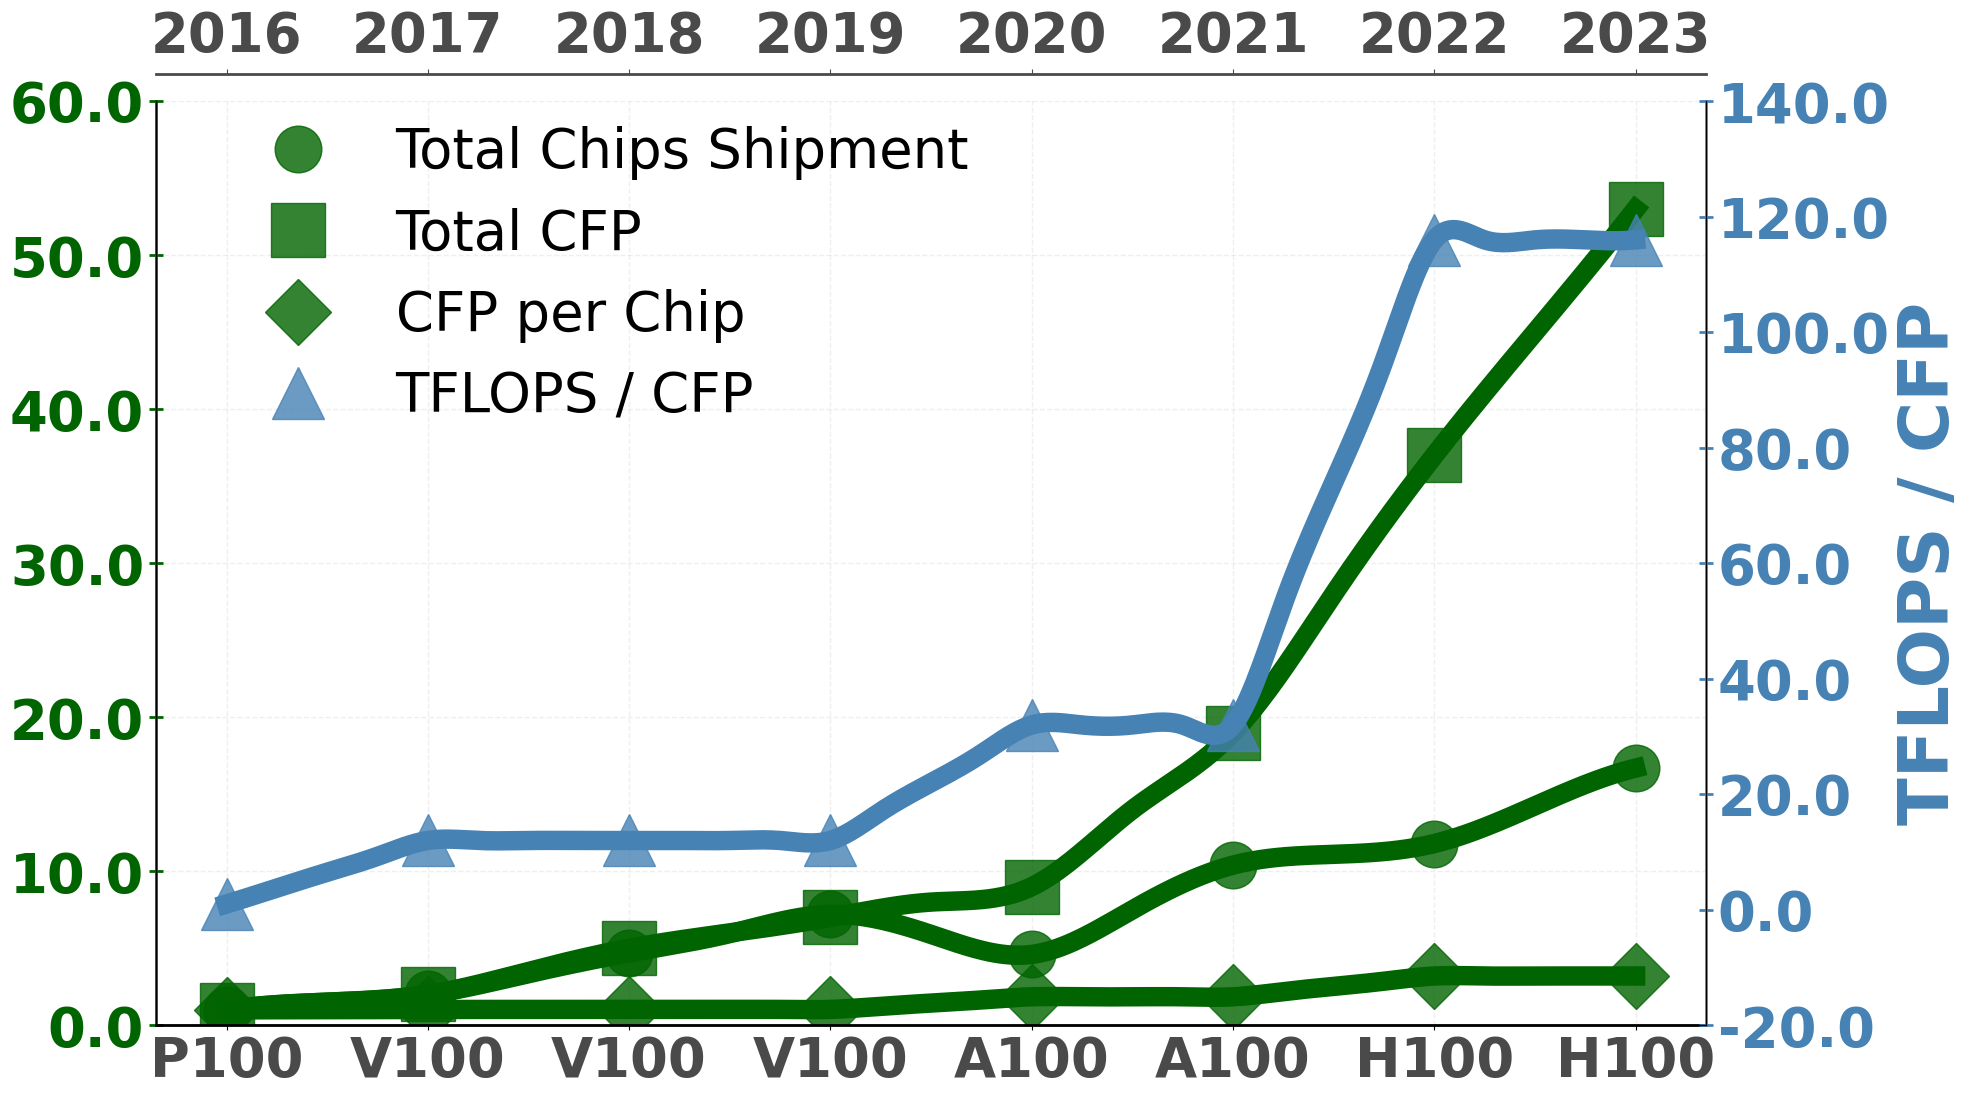

In [ ]:


fig = normalized_perf_plot(nv_data, server=True)
fig.savefig('new_plots/server_GPU_annual_growth_trend.pdf', dpi=300, bbox_inches='tight')

# plt.show()